In [7]:
### IMPORT LIBRARIES ###
import os
import math
import magpy as mp
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

pd.get_option("mode.chained_assignment")
pd.set_option("mode.chained_assignment", None)

combined_path = "/proj/magness/CDS010-014-015_combined"
contrast_palette = ['#00ff7f','#b22222','#b8b8b8','#f0e68c','#705000','#00bfff','#dda0dd','#00ffff','#ccccff',
                    '#ff0000','#808000','#3cb371','#a97a67','#ff8c00','#ffd700','#02026e','#adff2f','#4169e1',
                    '#ffa07a','#2f4f4f','#7f007f','#6e6e6e','#ff00ff']

##Setting figure output parameters
# sc.set_figure_params(dpi_save = 300, dpi = 200, format = 'svg')
fig_path = combined_path+'Goblets/'
sc.settings.figdir = fig_path

plt.rcParams ['figure.facecolor'] = 'white'

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



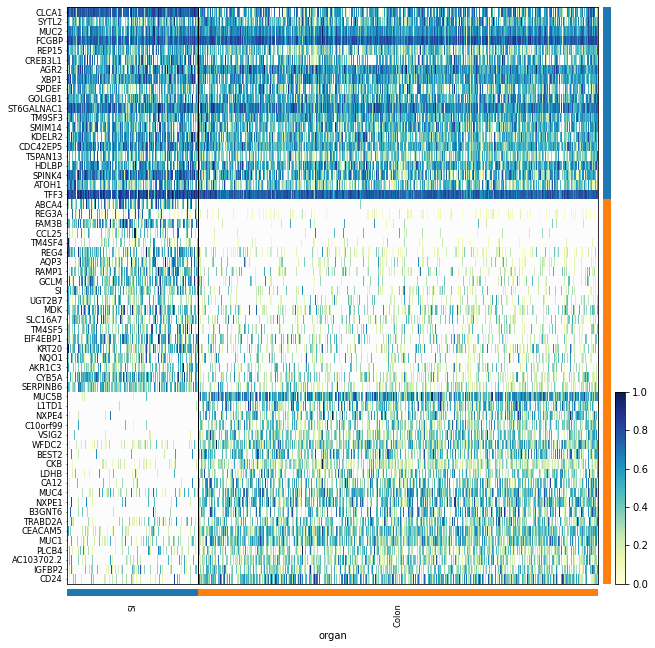

In [8]:
### Figure 10A - "Pan-Goblet Cell" Heatmap for SI vs Colon GCs DEGs ###

adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad") #Check if latest version
adata = mp.scale_adata(adata)

#goblet cells
subset = adata[adata.obs.type=='goblet']

gene_dict_gob = {
    'Goblet_genes':['CLCA1',	'SYTL2',	'MUC2',	'FCGBP',	'REP15',	'CREB3L1',	'AGR2',	'XBP1',	'SPDEF',	'GOLGB1',	'ST6GALNAC1',	'TM9SF3',	'SMIM14',	'KDELR2',	'CDC42EP5',	'TSPAN13',	'HDLBP',	'SPINK4',	'ATOH1',	'TFF3'],
    'SI_gob_diff_genes':['ABCA4',	'REG3A',	'FAM3B',	'CCL25',	'TM4SF4',	'REG4',	'AQP3',	'RAMP1',	'GCLM',	'SI',	'UGT2B7',	'MDK',	'SLC16A7',	'TM4SF5',	'EIF4EBP1',	'KRT20',	'NQO1',	'AKR1C3',	'CYB5A',	'SERPINB6'],
    'C_gob_diff_genes':['MUC5B',	'L1TD1',	'NXPE4',	'C10orf99',	'VSIG2',	'WFDC2',	'BEST2',	'CKB',	'LDHB',	'CA12',	'MUC4',	'NXPE1',	'B3GNT6',	'TRABD2A',	'CEACAM5',	'MUC1',	'PLCB4',	'AC103702.2',	'IGFBP2',	'CD24']
}

subset.obs.organ.cat.reorder_categories(['SI','Colon'], inplace=True)
sc.pl.heatmap(subset, gene_dict_gob, groupby = 'organ' , swap_axes = True, show_gene_labels = True, cmap = mp.blues, standard_scale = 'var') #save = "PanGobletCell_Heatmap"


Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

mucins SI vs colon GCs


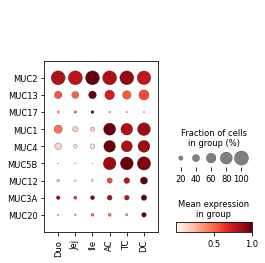

mucins SI AEs vs colon ACCs


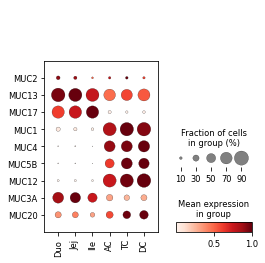

In [9]:
### Figure 10B - Mucins in SI vs. Colon by Region, All Lineages vs. GCs ###
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad") #Check if latest version

#List of Mucin Genes in SI vs Colon GCs, reordered by trends
subset = adata[adata.obs.type=='goblet']
subset = mp.scale_adata(subset,groupby = 'region')
gene_list = ['MUC2','MUC13','MUC17','MUC1','MUC4','MUC5B','MUC12','MUC3A','MUC20']

# Figure 10C Dotplot of mucin gene expression across SI vs colon GOBLET cells
print('mucins SI vs colon GCs')
sc.pl.dotplot(subset, gene_list, groupby = 'region', swap_axes = True, layer='raw_scaled') #save = "Mucins_SI_C_GCs_Region" 

# Figure 10D otplot of mucin gene expression across SI AEs and Colon ACCs
subset = adata[adata.obs.lineage.isin(['SI_earlyAE','SI_intermAE','SI_matureAE','C_earlyACC','C_lateACC'])]
subset = mp.scale_adata(subset,groupby='region')
print('mucins SI AEs vs colon ACCs')
sc.pl.dotplot(subset, gene_list, groupby = 'region', swap_axes = True, layer='raw_scaled') #save = "Mucins_AEs_ACCs_Region" 


Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

Determining highly variable genes...
Highly variable genes: 4000
Computing principal components...


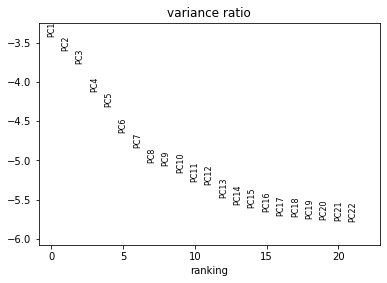

2023-03-17 11:51:37,081 - harmonypy - INFO - Iteration 1 of 30
2023-03-17 11:51:37,170 - harmonypy - INFO - Iteration 2 of 30


Running harmonypy integration of principal components...


2023-03-17 11:51:37,258 - harmonypy - INFO - Iteration 3 of 30
2023-03-17 11:51:37,346 - harmonypy - INFO - Iteration 4 of 30
2023-03-17 11:51:37,442 - harmonypy - INFO - Iteration 5 of 30
2023-03-17 11:51:37,522 - harmonypy - INFO - Iteration 6 of 30
2023-03-17 11:51:37,602 - harmonypy - INFO - Iteration 7 of 30
2023-03-17 11:51:37,645 - harmonypy - INFO - Iteration 8 of 30
2023-03-17 11:51:37,688 - harmonypy - INFO - Iteration 9 of 30
2023-03-17 11:51:37,731 - harmonypy - INFO - Iteration 10 of 30
2023-03-17 11:51:37,766 - harmonypy - INFO - Iteration 11 of 30
2023-03-17 11:51:37,801 - harmonypy - INFO - Converged after 11 iterations


Computing neighborhood graph...
Calculating Leiden clusters...
Running UMAP dimensionality reduction...


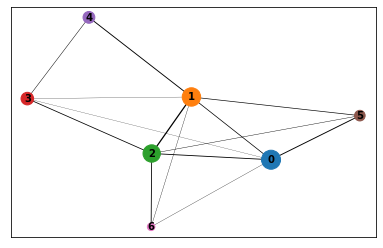

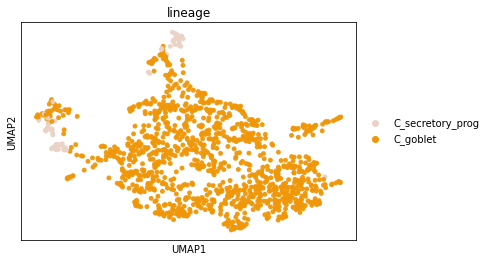

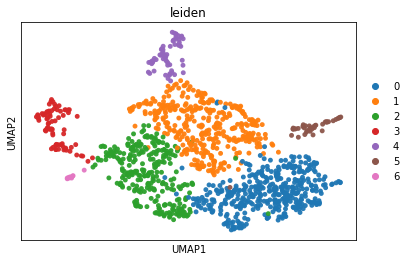

Trying to set attribute `.uns` of view, copying.


Clustering complete.



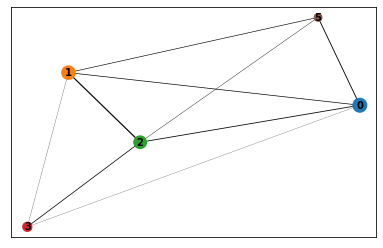

0    413
1    362
2    287
3     79
4     61
5     40
6     10
Name: leiden, dtype: int64
Highly variable genes: 4000


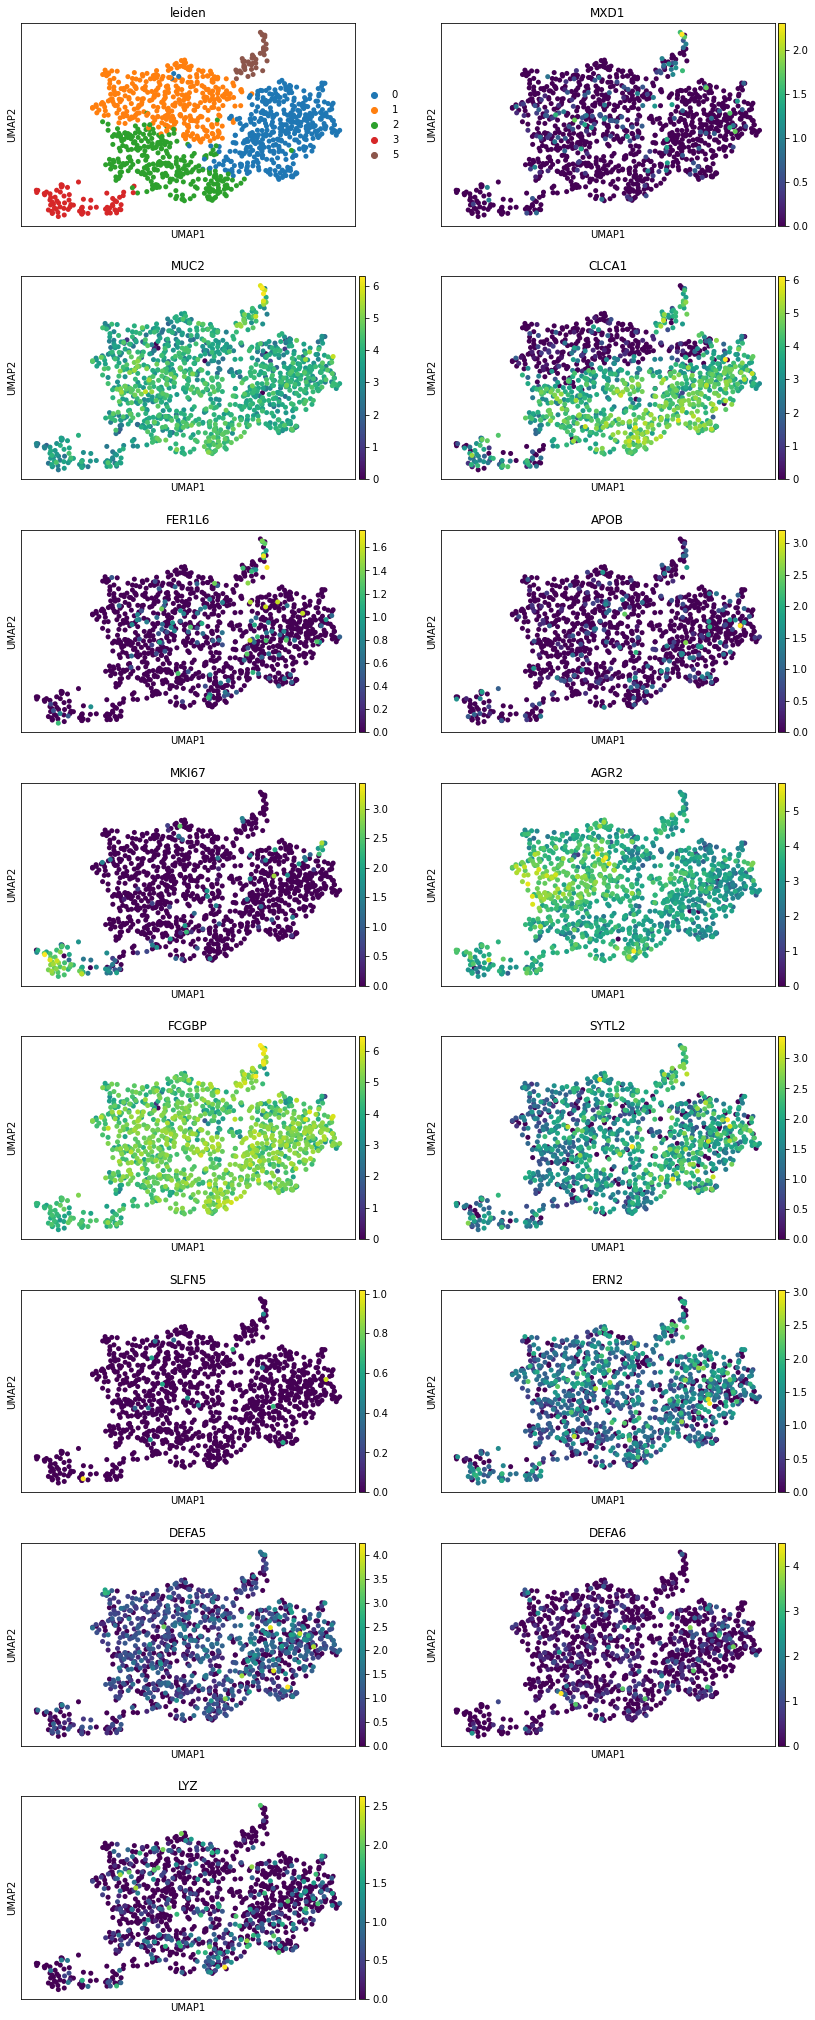

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,5_n,5_p
0,MTRNR2L12,4.414591e-37,AGR2,1.760797e-20,RPLP1,1.694923e-55,TUBA1B,8.810359e-48,KRT20,4.469422e-17
1,CLCA1,5.615384e-27,MT1E,1.006188e-16,RPL10,1.208330e-51,H2AFZ,8.635662e-44,TSPAN1,9.756972e-16
2,FRYL,9.465166e-18,MT1X,2.317370e-16,RPL41,3.082836e-50,HMGB2,2.956918e-41,CKB,1.580180e-12
3,MTRNR2L8,6.601670e-14,MT1G,2.122735e-15,RPL30,1.643094e-49,HMGB1,3.707461e-41,S100A6,4.879805e-12
4,SYTL2,5.720550e-13,RPS14,5.563463e-14,RPS12,1.652392e-47,HMGN2,2.288487e-40,PHGR1,5.373160e-12
5,CDHR1,4.331809e-09,PPIB,1.334615e-13,RPL28,1.533482e-46,PTMA,5.738898e-36,GSN,6.299207e-12
6,ARGLU1,1.262184e-08,RPL34,3.780610e-12,RPL32,4.072515e-45,STMN1,1.723763e-35,ZG16,8.310147e-12
7,ITGA6,3.055416e-08,RPS11,5.296047e-12,RPS13,6.278875e-44,TOP2A,7.443256e-34,IFI27,7.839086e-11
8,PLCG2,5.624344e-08,RPL36A,1.306898e-11,RPL19,1.028972e-42,MKI67,3.192194e-32,RAB27A,3.337674e-10
9,ABCA5,9.894969e-08,RPL17,1.514546e-11,RPL7A,2.135201e-42,TUBB4B,1.672916e-31,DHRS9,3.682976e-09


In [10]:
### Figure 10E, 11A - GC subclustering

## Goblet cell subclustering

adata = mp.load(combined_path, 'clustered_annotated_adata_k25_lr0.92_v1.5.h5ad')

mito_genes = adata.var_names.tolist()
mito_genes[:] = [gene for gene in mito_genes if gene.startswith('MT-')]
mito_genes.append('MALAT1')

# switch below C tag for SI when looking at SI subclustering for supplemental figure 11
gob_subset = adata[adata.obs.lineage.isin(['C_goblet','C_secretory_prog']),~adata.var_names.isin(mito_genes)].copy()
raw_subset = gob_subset.raw.to_adata().copy()
raw_subset = raw_subset[:,~adata.var_names.isin(mito_genes)].copy()
del gob_subset.raw
gob_subset.raw = raw_subset.copy()

#colon settings
num_neighbors = 5
num_pcs = 22
leiden_res = 0.3
hvg_num = 4000
kwargs = {'max_iter_harmony':30}

# ##SI settings
# num_neighbors = 10
# num_pcs = 19
# leiden_res = 0.4
# hvg_num = 2000
# kwargs = {'max_iter_harmony':30}

gob_subset = mp.pipeline.recluster(gob_subset, save=False, expt_path=combined_path, #write_file='gob_subclustering_for_DE.h5ad', 
                                   use_raw = True, recalc_pca = True, reembed=True, regress_qc_params = False,
                                   recalc_hvg = True, hvg_num = hvg_num, harmonize=True, annotate_cell_cycle=True, 
                                   regress_cell_cycle=False, num_pcs=num_pcs, num_neighbors=num_neighbors, 
                                   leiden_res=leiden_res, rescale_data = False, **kwargs)

gob_subset2 = gob_subset[~gob_subset.obs.leiden.isin(['4','6'])]
# gob_subset2 = gob_subset[~gob_subset.obs.leiden.isin([])]

sc.tl.paga(gob_subset2, groups = 'leiden')
sc.pl.paga(gob_subset2)
sc.tl.umap(gob_subset2, init_pos = 'paga')

print(gob_subset.obs.leiden.value_counts())

print("Highly variable genes: %d"%sum(gob_subset.var.highly_variable))

sc.pl.umap(gob_subset2, color = ['leiden','MXD1','MUC2','CLCA1','FER1L6','APOB','MKI67','AGR2','FCGBP','SYTL2','SLFN5','ERN2','DEFA5','DEFA6','LYZ'], ncols = 2)

sc.tl.rank_genes_groups(gob_subset2, 'leiden', method='wilcoxon')

result = gob_subset2.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(20)

# mp.save(gob_subset2, combined_path, 'SI_gob_subclustering_for_DE.h5ad')

display(df)

Reading data from /proj/magness/CDS010-014-015_combined/C_gob_subclustering_for_DE.h5ad



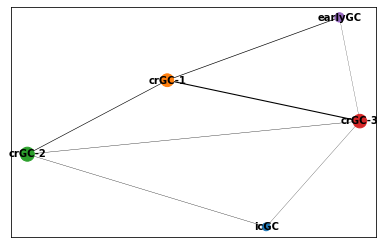

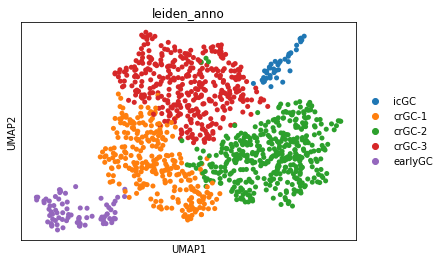

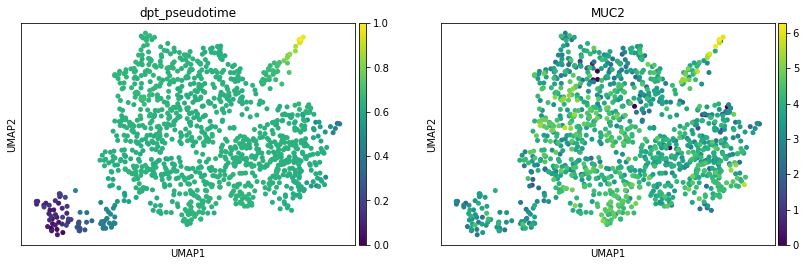

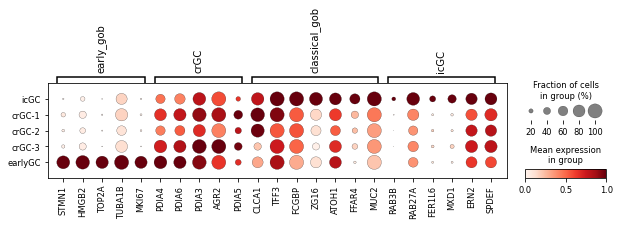

In [13]:
###Figure 10 E,F,G & 11A,C
adata = mp.load(combined_path, 'C_gob_subclustering_for_DE.h5ad')

Gob_dict = {'early_gob':['STMN1','HMGB2','TOP2A','TUBA1B','MKI67'],
            'crGC':['PDIA4','PDIA6','PDIA3','AGR2','PDIA5'],
            'classical_gob':['CLCA1','TFF3','FCGBP','ZG16','ATOH1','FFAR4','MUC2'],
            'icGC':['RAB3B','RAB27A','FER1L6','MXD1','ERN2','SPDEF']
           }

mucins = ['MUC2','MUC13','MUC1','MUC4','MUC5B','MUC12','MUC3A','MUC17','MUC20']

sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

adata.uns['leiden_colors'] = contrast_palette

adata.obs['leiden_anno'] = adata.obs['leiden']
adata.uns['leiden_anno_colors'] = contrast_palette

###C Leiden Names
C_leiden_order = ['icGC','crGC-1','crGC-2','crGC-3','earlyGC']
adata.obs['leiden_anno'].cat.categories = ['crGC-2','crGC-3','crGC-1','earlyGC','icGC']
adata.obs.leiden_anno.cat.reorder_categories(C_leiden_order, inplace=True)

###SI leiden names
# SI_leiden_order = ['mature GC','ERN2_high','REG1A_high','AGR2_high','earlyGC']
# adata.obs['leiden_anno'].cat.categories = ['REG1A_high','AGR2_high','mature GC','ERN2_high','earlyGC']
# adata.obs.leiden_anno.cat.reorder_categories(SI_leiden_order, inplace=True)

sc.tl.paga(adata, groups = 'leiden_anno')
sc.pl.paga(adata)
sc.tl.draw_graph(adata, init_pos='umap')

root_cells = np.where(adata.obs['leiden_anno'] == 'earlyGC')[0]

root_cell = np.random.choice(root_cells)

adata.uns['iroot'] = root_cell

sc.tl.dpt(adata)

##Fig 10E, 11A
sc.pl.umap(adata, color = ['leiden_anno'])#, save = '_supp_SI_gob_subset_leiden')
##Fig 10F,G & 11A
sc.pl.umap(adata, color = ['dpt_pseudotime','MUC2'])#, save = '_supp-SI_gob_subset_dpt_MUC2')

adata = mp.scale_adata(adata, groupby = 'leiden_anno')


##Figure 10H & 11B or 10J,11C if you switch out Gob_dict for mucins list above

sc.pl.dotplot(adata, Gob_dict, groupby = 'leiden_anno', swap_axes = False, layer = 'raw_scaled')#, save = 'fig5_C_gob_subset_maturity')
